In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:\\Users\\chanc\\OneDrive\\Desktop\\EDA\\project3\\blinkit_data.csv")
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [5]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [7]:
df.shape
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#data cleaning


In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [2]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#Businees requirement

#KPI"S

In [13]:
#total sales
total_sales=df['Sales'].sum()
#average sales
avg_sales=df['Sales'].mean()
#no.of item sold
no_of_item_sold=df['Sales'].count()
avg_sales=df['Sales'].mean()
#average rating
avg_rating=df['Rating'].mean()

#display
print(total_sales)
print(avg_sales)
print(no_of_item_sold)
print(avg_rating)


1201681.4808
140.9927819781767
8523
3.965857092573038


#Chart Requirements

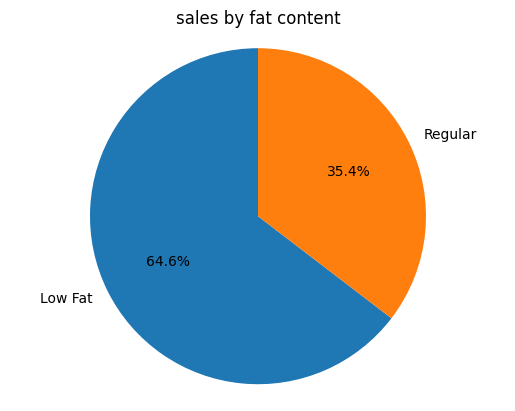

In [8]:
#total sales by fat content
sales_by_fat=df.groupby(['Item Fat Content'])['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title("sales by fat content")
plt.axis('equal')
plt.show()

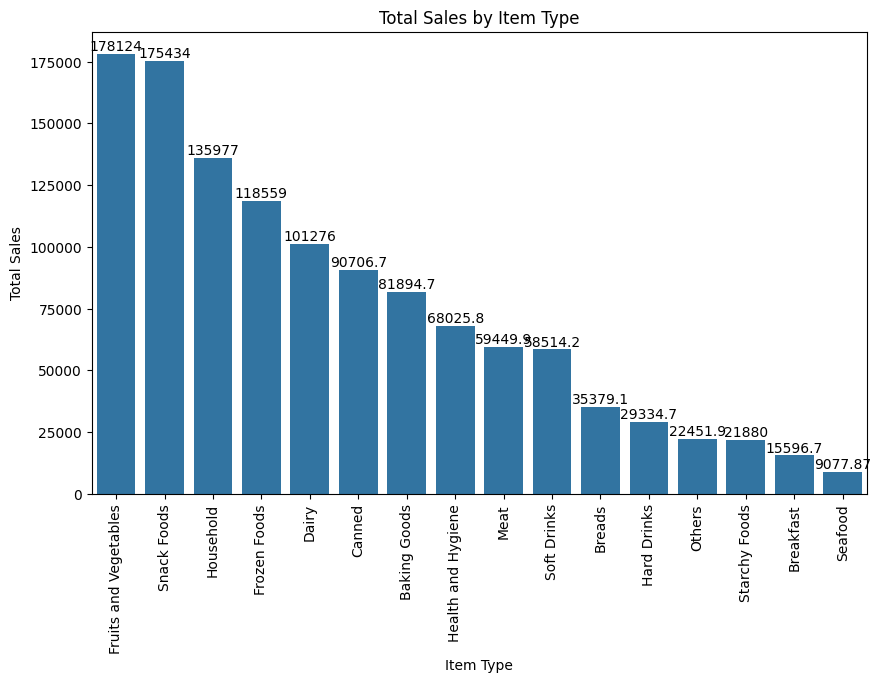

In [5]:
# Total sales by item type
sales_by_type = df.groupby(['Item Type'])['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))

# Use sns.barplot for aggregated numeric data
ax = sns.barplot(data=sales_by_type, x='Item Type', y='Sales')

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.show()


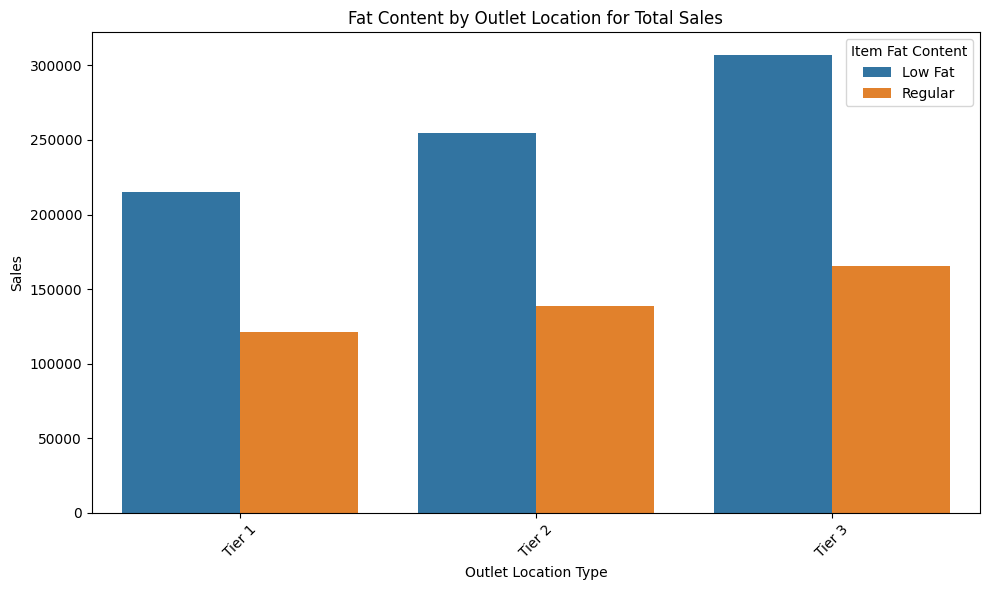

In [7]:
#fat content by  outlet for total sales
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Seaborn barplot with Outlet Location Type on x-axis, Sales on y-axis, and hue as Item Fat Content
ax = sns.barplot(
    data=grouped,
    x='Outlet Location Type',
    y='Sales',
    hue='Item Fat Content'
)

plt.title('Fat Content by Outlet Location for Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Item Fat Content')
plt.show()


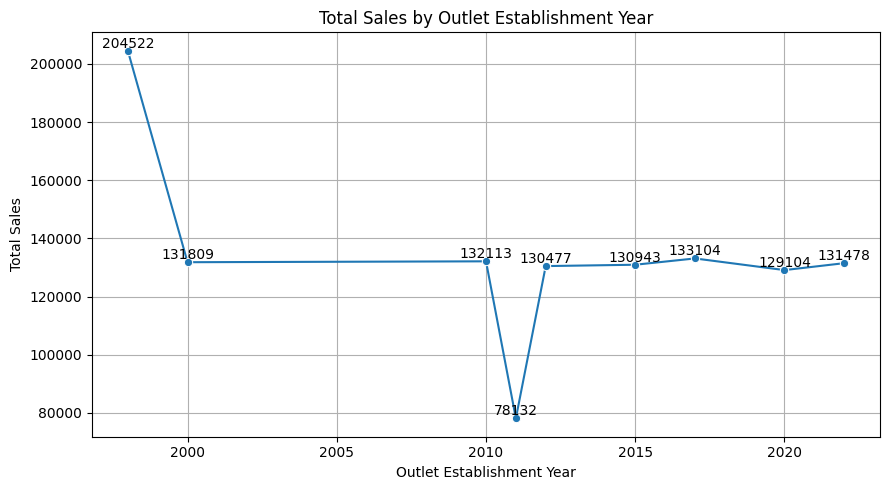

In [10]:
#total sale sby outlet establishment
sales_by_year = df.groupby(['Outlet Establishment Year'])['Sales'].sum().reset_index()

sales_by_year = df.groupby(['Outlet Establishment Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(9, 5))

# Create the line plot
ax = sns.lineplot(
    data=sales_by_year,
    x='Outlet Establishment Year',
    y='Sales',
    marker='o'
)

# Add data labels on top of the markers
for x, y in zip(sales_by_year['Outlet Establishment Year'], sales_by_year['Sales']):
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


    

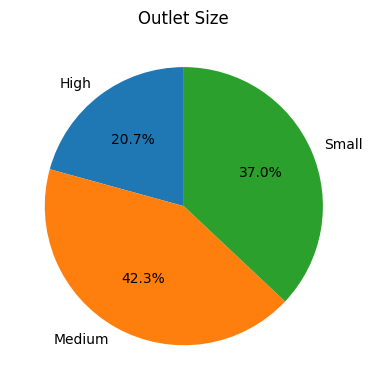

In [11]:
#sales by outlet size
sales_by_size=df.groupby(['Outlet Size'])['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

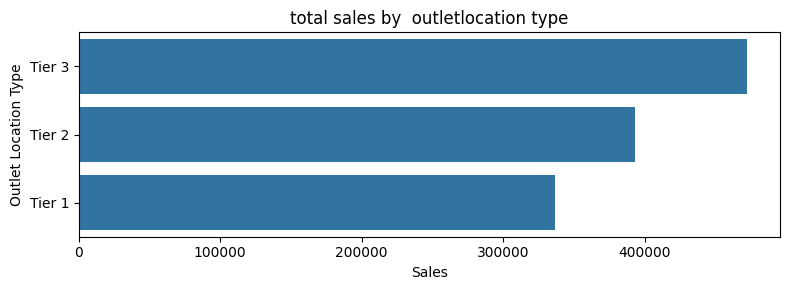

In [12]:
#sales by outlet location
sales_by_location=df.groupby(['Outlet Location Type'])['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)

plt.title('total sales by  outletlocation type')
plt.tight_layout()
plt.show()